## Visualize and analyze the local field potential

Local field potential (LFP) is the voltage recorded in the extracellular space.

In our model, we can estimate the LFP using a tool derived from Reimann et al., 2013.

---

Import some python packages

In [1]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns

Reading and preparing the data

In [2]:
data_path = '/gpfs/bbp.cscs.ch/project/proj112/simulations/CA1.O1.mooc-circuit/LFP/full_dt05/LFP/t0_sample_points'
points_path = "/gpfs/bbp.cscs.ch/project/proj112/simulations/CA1.O1.20200820/lfp_points.txt"

In [3]:
# LFP is calculated in 11 points spamming in the middle of the microcircuit
# the result is stored in a text file where the first column is time and
# the other columns are the LFP calculated at different location
data = np.loadtxt(data_path)

In [4]:
rows, colums = data.shape
nsamples = colums-1 # number of locations
dt = data[:,0][1]-data[:,0][0] # time step (ms)
simtime = rows * dt # simulation time (ms)
timeskip = 100 # initial time to skip (ms)
skip = int(timeskip / dt) # number of time steps to skip

In [22]:
# this table contains the points where the LFP is calculated
points = pd.read_csv(points_path, delimiter=" ", names=["x", "y", "z", "layer"])
points.head()

,x,y,z,layer
0,360.0,0.0,630.0,SO
1,360.0,66.0,630.0,SO
2,360.0,132.0,630.0,SO
3,360.0,198.0,630.0,SP
4,360.0,264.0,630.0,SR


In [6]:
layers = points["layer"].values

Plot LFP traces for the different points

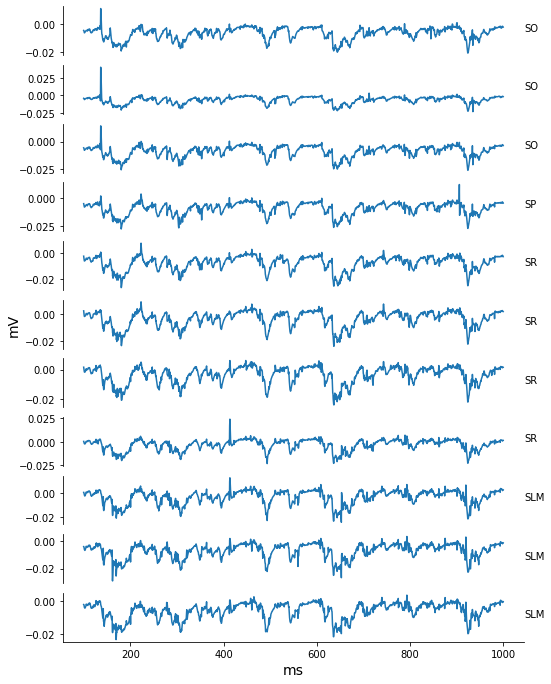

In [7]:
fig, axs = plt.subplots(nrows=nsamples, sharex=False, sharey=False, figsize=(8.27, 11.69))

for idx in range(nsamples):
    t = data[:,0][skip:]
    v = data[:,nsamples-idx][skip:]/1000000 # nV -> mV
    if nsamples == 1:
        axs.plot(t, v)
        axs.set_frame_on(False)
    else:
        axs[idx].plot(t, v)
        axs[idx].spines['top'].set_visible(False)
        axs[idx].spines['right'].set_visible(False)
        
        if idx<(nsamples-1):
            axs[idx].spines['bottom'].set_visible(False)
            axs[idx].set_xticks([])
        else:
            axs[idx].set_xlabel("ms", fontsize=14)
        
        if idx==round(nsamples/2)-1:
            axs[idx].set_ylabel("mV", fontsize=14)
        
        xmin, xmax = axs[idx].get_xlim()
        ymin, ymax = axs[idx].get_ylim()
        axs[idx].text(xmax, (ymin+ymax)/2, layers[idx])

plt.show()

Plot one trace

/Users/romani/Desktop/HippoCodes/notebooks/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


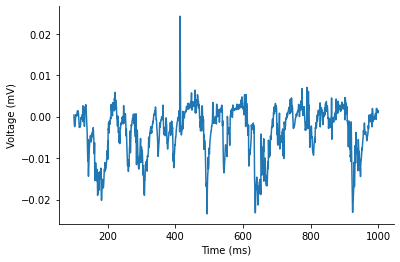

In [8]:
fig, ax = plt.subplots()
t = data[:,0][skip:]
v = data[:,4][skip:]/1000000 # nV -> mV
ax.plot(t, v)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (mV)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.show()

Calculate the power spectrum

In [9]:
Fs = 1000/dt # sampling rate (Hz)

In [10]:
f, psd = scipy.signal.welch(data[:,4][skip:], Fs, nperseg=1000)

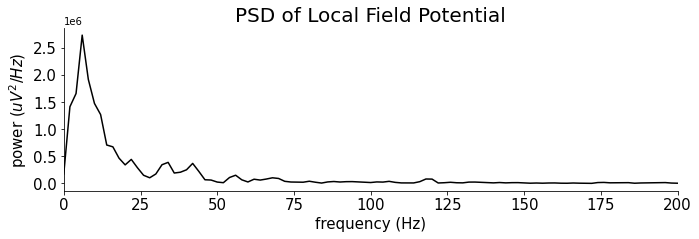

In [11]:
# Plot the power spectrum
fig = plt.figure(figsize=(11,3))
plt.plot(f,psd,'k')
sns.despine()
plt.xlim((0,200))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('power ($uV^{2}/Hz$)',size=15)
plt.xlabel('frequency (Hz)',size=15)
plt.title('PSD of Local Field Potential', size=20)
plt.show()

In [12]:
print("Peak at", psd.argmax(), "Hz")

Peak at 3 Hz


### Excercise

__Exercise 1__

In [path to lfp points], you find the LFP calculated with a smaller time step (0.1 ms).

Plot the traces with different time steps in the same figure. Do you notice differences? How can you explain them?

__Exercise 2__

Take the simulation we used to calculate the LFP with a time step of 0.5 ms.

It is available at XXX.

Compute the LFP in the same central points as above, but only considering the cells within 50 um from the center. To do that, use cells_within_50_um_from_the_center as target (instead of Mosaic).

Do you notice differences? How can you explain them?